# Carbon dioxide (CO2): historical time-series

----------

J. Potemra <br>
February 2924

----------

This notebook will access the long-term measurements of atmospheric CO2 from the Muana Loa observatory and oceanic values from the Hawaii Ocean Time-series (HOT) to show long-term trends in CO2.

The atmospheric values come from the Earth System Research Laboratory (ESRL) at NOAA (https://www.esrl.noaa.gov/), and the HOT data come from the University of Hawaii (http://hahana.soest.hawaii.edu/hot).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

## Get the atmospheric obs from NOAA
The

The graphs show monthly mean carbon dioxide measured at Mauna Loa Observatory, Hawaii. The carbon dioxide data on Mauna Loa constitute the longest record of direct measurements of CO2 in the atmosphere. They were started by C. David Keeling of the Scripps Institution of Oceanography in March of 1958 at a facility of the National Oceanic and Atmospheric Administration [Keeling, 1976]. NOAA started its own CO2 measurements in May of 1974, and they have run in parallel with those made by Scripps since then [Thoning, 1989]. 

In [2]:
# Get the CO2 data from NOAA
URL1 = 'https://www.esrl.noaa.gov/gmd/aftp/data/trace_gases/co2/in-situ/surface/txt/co2_mlo_surface-insitu_1_ccgg_MonthlyData.txt'
CO2_data = pd.read_csv(URL1,delim_whitespace=True,header=158,usecols=range(11))
CO2_data = CO2_data.replace(-999.99, np.nan)
CO2_data['datetime'] = pd.to_datetime(CO2_data['datetime'])

# Get the HOT data from U. Hawaii
The data set is called "HOT_surface_CO2.txt" and can be found at http://hahana.soest.hawaii.edu/hotco2/products.html.  The dataset was by John Dore (jdore@montana.edu) and can be cited as:

Dore, J.E., R. Lukas, D.W. Sadler, M.J. Church, and D.M. Karl.  2009.  Physical and biogeochemical modulation of ocean acidification in the central North Pacific.  Proc Natl Acad Sci USA 106:12235-12240.

There is also documentation (HOT_surface_CO2_readme.pdf) at http://hahana.soest.hawaii.edu/hot/products/products.html

The data are laid out in an ASCII table, so we can use pandas read_csv to read them in and put them in a DataFrame.  Note that the file has header information at the top, so we will skip that (header=7 to skip the top seven lines).  Note also that the file has column headings, so we can read them directly. Remember the tide gauge data had none, so we manually created it; here we just read it and the DataFrame will use it as the column headings.  Finally, this file is __not__ comma separated, but __white space__ separated (data columns are separated by a different number of white spaces).

In [3]:
# Get the HOT data from UH
URL2 = 'https://hahana.soest.hawaii.edu/hot/hotco2/HOT_surface_CO2.txt'
HOT_data = pd.read_csv(URL2,header=7, delim_whitespace=True)
HOT_data = HOT_data.replace(-999.0, np.nan)
HOT_data['date'] = pd.to_datetime(HOT_data['date'])

/var/folders/_y/4j2f051d3pz0ldwl8jv8wgg40000gn/T/ipykernel_41188/3617015146.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  HOT_data['date'] = pd.to_datetime(HOT_data['date'])


In [4]:
# Now we need to fit some lines; to do this, we will use the scipy linear regression
# module
# define variables; note we only use rows where the variable is non a NAN

x1 = np.array(CO2_data[CO2_data['value'].notna()]['datetime'],dtype=float)
y1 = np.array(CO2_data['value'].dropna(),dtype=float)
slope1, intercept1, r_value1, p_value1, std_err1 = sp.linregress(x1,y1)
xf = np.linspace(min(x1),max(x1),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf1 = (slope1*xf)+intercept1
#print('r = ', r_value1, '\n', 'p = ', p_value1, '\n', 's = ', std_err1)

x2 = np.array(HOT_data[HOT_data['pCO2calc_insitu'].notna()]['date'], dtype=float)
y2 = np.array(HOT_data['pCO2calc_insitu'].dropna(), dtype=float)
slope2, intercept2, r_value2, p_value2, std_err2 = sp.linregress(x2,y2)
xf = np.linspace(min(x2),max(x2),100)
xf2 = xf.copy()
xf2 = pd.to_datetime(xf2)
yf2 = (slope2*xf)+intercept2
#print('r = ', r_value2, '\n', 'p = ', p_value2, '\n', 's = ', std_err2)

x3 = np.array(HOT_data[HOT_data['pHmeas_insitu'].notna()]['date'], dtype=float)
y3 = np.array(HOT_data['pHmeas_insitu'].dropna(), dtype=float)
slope3, intercept3, r_value3, p_value3, std_err3 = sp.linregress(x3,y3)
xf = np.linspace(min(x3),max(x3),100)
xf3 = xf.copy()
xf3 = pd.to_datetime(xf3)
yf3 = (slope3*xf)+intercept3
#print('r = ', r_value3, '\n', 'p = ', p_value3, '\n', 's = ', std_err3)

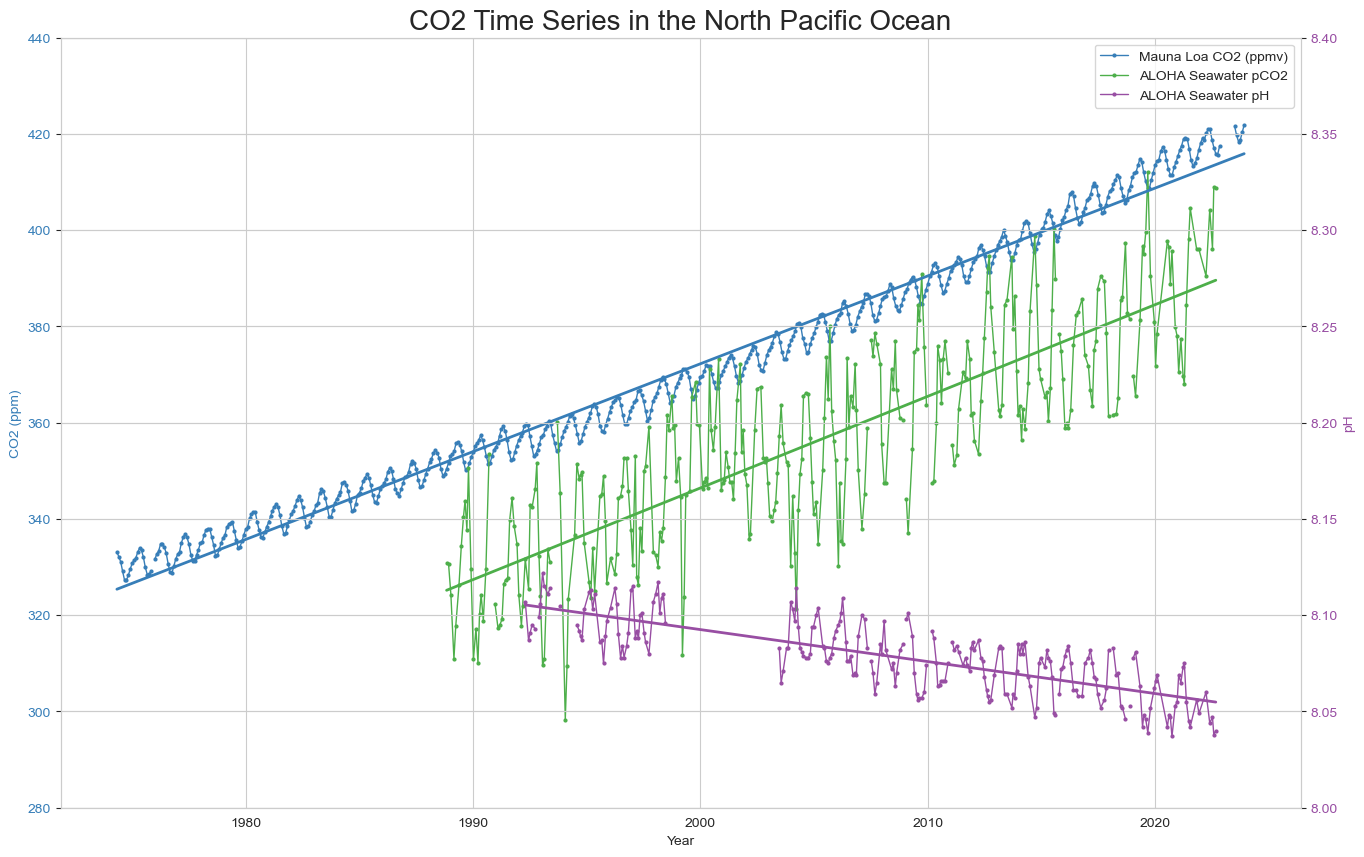

In [6]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a color palette
palette = sns.color_palette("Set1")

fig, ax = plt.subplots( figsize = (16,10) )
plt.title('CO2 Time Series in the North Pacific Ocean', fontsize=20)

# 1. make first plot, CO2 (atm and ocean) as ax1
ax.set_xlabel('Year')
# note here we can color the axis label the same as the line
ax.set_ylabel('CO2 (ppm)', color=palette[1])
ax.tick_params(axis='y', labelcolor=palette[1])

# save the plot object as lns1 and lns2
lns1 = ax.plot(CO2_data['datetime'], CO2_data['value'], marker = 'o', markersize=2, linewidth=1, color=palette[1], label='Mauna Loa CO2 (ppmv)')
lns2 = ax.plot(HOT_data['date'], HOT_data['pCO2calc_insitu'], marker='o', markersize=2, linewidth=1, color=palette[2], label='ALOHA Seawater pCO2')
ax.plot(xf1, yf1, color=palette[1], linewidth=2)
ax.plot(xf2, yf2, color=palette[2], linewidth=2)
ax.set_ylim(280,440)

# 2. instantiate a second axes that shares the same x-axis
ax2 = ax.twinx()
ax2.set_ylabel('pH', color=palette[3])
ax2.tick_params(axis='y', labelcolor=palette[3])

# save the third plot object as lns3
lns3 = ax2.plot(HOT_data['date'], HOT_data['pHmeas_insitu'], marker='o', markersize=2, linewidth=1, color=palette[3], label='ALOHA Seawater pH')
ax2.plot(xf3, yf3, color=palette[3], linewidth=2)
ax2.set_ylim(8.0, 8.4)

# finally, show the legend based on lns1, lns2 and lns3
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.savefig('images/historical-co2-ts.png')